In [16]:
import pandas as pd
import glob

company_metadata_files = glob.glob("/workspace/data/preprocessed/company_metadata/*.csv")
companies = pd.concat((pd.read_csv(f) for f in company_metadata_files), ignore_index=True)

companies["cik"] = companies["cik"].astype(str).str.zfill(10)

In [19]:
MAG7_CIKS = [
    "0000320193",  # Apple Inc.
    "0000789019",  # Alphabet Inc.
    "0001018724",  # Amazon.com, Inc.
    "0001318605",  # Meta Platforms, Inc.
    "0001652044",  # Microsoft Corporation
    "0001326801",  # Tesla, Inc.
    "0001045810",  # NVIDIA Corporation
]

mag7 = companies[companies["cik"].isin(MAG7_CIKS)]

mag7

,cik,name,sic,countryba,stprba,cityba,bas1,bas2
1905,0001652044,ALPHABET INC.,7370.0,US,CA,MOUNTAIN VIEW,1600 AMPHITHEATRE PARKWAY,NaN
3170,0000789019,MICROSOFT CORP,7372.0,US,WA,REDMOND,ONE MICROSOFT WAY,NaN
4970,0001318605,"TESLA, INC.",3711.0,US,CA,PALO ALTO,3500 DEER CREEK RD,NaN
7194,0001045810,NVIDIA CORP,3674.0,US,CA,SANTA CLARA,2788 SAN TOMAS EXPRESSWAY,NaN
10562,0001018724,AMAZON COM INC,5961.0,US,WA,SEATTLE,410 TERRY AVENUE NORTH,NaN
12789,0001326801,"META PLATFORMS, INC.",7370.0,US,CA,MENLO PARK,1 META WAY,NaN
13102,0000320193,APPLE INC,3571.0,US,CA,CUPERTINO,ONE APPLE PARK WAY,NaN


In [13]:
financial_statements_files = glob.glob("/workspace/data/preprocessed/financial_statements/*.csv")
financial_statements = pd.concat((pd.read_csv(f) for f in financial_statements_files), ignore_index=True)

/tmp/ipykernel_2183/2425557163.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  financial_statements = pd.concat((pd.read_csv(f) for f in financial_statements_files), ignore_index=True)


In [21]:
financial_statements["cik"] = financial_statements["cik"].astype(str).str.zfill(10)

In [33]:
mag7_financial_statements = mag7.merge(
    financial_statements,
    on="cik",
    how="inner",
)

mag7_financial_statements["ddate"] = pd.to_datetime(mag7_financial_statements["ddate"])

In [59]:
mag7_financial_statements["tag"].unique()

array(['Liabilities', 'LiabilitiesCurrent',
       'ResearchAndDevelopmentExpense',
       'NetCashProvidedByUsedInFinancingActivities',
       'OperatingIncomeLoss', 'StockholdersEquity',
       'NetCashProvidedByUsedInInvestingActivities',
       'PaymentsToAcquirePropertyPlantAndEquipment',
       'NetCashProvidedByUsedInOperatingActivities',
       'RevenueFromContractWithCustomerExcludingAssessedTax',
       'CostOfRevenue', 'EarningsPerShareDiluted',
       'RetainedEarningsAccumulatedDeficit',
       'AccountsReceivableNetCurrent', 'NetIncomeLoss',
       'CashAndCashEquivalentsAtCarryingValue', 'Assets', 'InventoryNet',
       'AssetsCurrent', 'CommonStockDividendsPerShareDeclared',
       'Revenues', 'LongTermDebtNoncurrent', 'CostOfGoodsAndServicesSold',
       'DepreciationAndAmortization',
       'StockholdersEquityIncludingPortionAttributableToNoncontrollingInterest',
       'InterestExpense', 'SellingGeneralAndAdministrativeExpense',
       'LongTermDebt'], dtype=object)

In [37]:
mag7_series = mag7_financial_statements.pivot_table(
    index=["ddate"],
    columns=["name", "tag"],
    values="value"
).sort_index()

In [56]:
mag7_series

name                      ALPHABET INC.                              \
tag        AccountsReceivableNetCurrent        Assets AssetsCurrent   
ddate                                                                 
2006-09-30                          NaN           NaN           NaN   
2006-12-31                          NaN           NaN           NaN   
2007-01-31                          NaN           NaN           NaN   
2007-06-30                          NaN           NaN           NaN   
2007-09-30                          NaN           NaN           NaN   
...                                 ...           ...           ...   
2024-10-31                          NaN           NaN           NaN   
2024-12-31                 5.234000e+10  4.502560e+11  1.637110e+11   
2025-01-31                          NaN           NaN           NaN   
2025-03-31                 5.100000e+10  4.753740e+11  1.620520e+11   
2025-04-30                          NaN           NaN           NaN   

name                                              \
tag        CashAndCashEquivalentsAtCarryingValue   
ddate                                              
2006-09-30                                   NaN   
2006-12-31                                   NaN   
2007-01-31                                   NaN   
2007-06-30                                   NaN   
2007-09-30                                   NaN   
...                                          ...   
2024-10-31                                   NaN   
2024-12-31                          2.346600e+10   
2025-01-31                                   NaN   
2025-03-31                          2.326400e+10   
2025-04-30                                   NaN   

name                                                           \
tag        CommonStockDividendsPerShareDeclared CostOfRevenue   
ddate                                                           
2006-09-30                                  NaN           NaN   
2006-12-31                                  NaN           NaN   
2007-01-31                                  NaN           NaN   
2007-06-30                                  NaN           NaN   
2007-09-30                                  NaN           NaN   
...                                         ...           ...   
2024-10-31                                  NaN           NaN   
2024-12-31                                  0.6  1.463060e+11   
2025-01-31                                  NaN           NaN   
2025-03-31                                  0.2  3.636100e+10   
2025-04-30                                  NaN           NaN   

name                                                           \
tag        EarningsPerShareDiluted InventoryNet   Liabilities   
ddate                                                           
2006-09-30                     NaN          NaN           NaN   
2006-12-31                     NaN          NaN           NaN   
2007-01-31                     NaN          NaN           NaN   
2007-06-30                     NaN          NaN           NaN   
2007-09-30                     NaN          NaN           NaN   
...                            ...          ...           ...   
2024-10-31                     NaN          NaN           NaN   
2024-12-31                    8.04          NaN  1.251720e+11   
2025-01-31                     NaN          NaN           NaN   
2025-03-31                    2.81          NaN  1.301070e+11   
2025-04-30                     NaN          NaN           NaN   

name                           ...   TESLA, INC.                      \
tag        LiabilitiesCurrent  ... NetIncomeLoss OperatingIncomeLoss   
ddate                          ...                                     
2006-09-30                NaN  ...           NaN                 NaN   
2006-12-31                NaN  ...           NaN                 NaN   
2007-01-31                NaN  ...           NaN                 NaN   
2007-06-30            

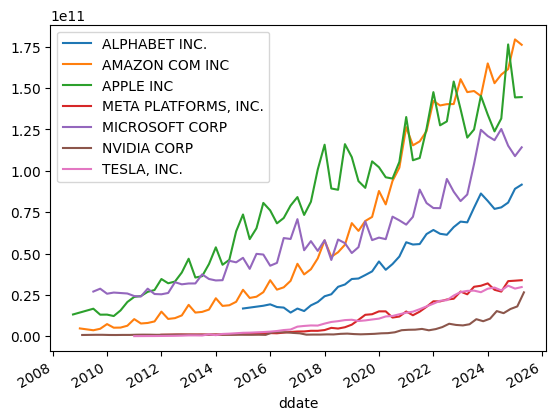

In [60]:
from matplotlib import pyplot as plt

assets = mag7_series.xs("LiabilitiesCurrent", level=1, axis=1).dropna(how="all")

for company in assets.columns:
    series = assets[company].dropna()
    series.plot(label=company)

plt.legend()